# Insurance Data Analysis

## Table of Contents
<ul>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

In [2]:
df= pd.read_csv(r"insurance-data.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [51]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [103]:
#making a copy of the dataframe with only numerical values
df['smoker_num']=df['smoker'].map(dict(yes=1, no=0))
df['region_num']=df['region'].map(dict(northeast=1, northwest=2, southeast=3, southwest=4))
df['sex_num']= df['sex'].map(dict(male=1, female=2))

In [104]:
df2=df.copy(deep=True)

In [105]:
df2.drop(['smoker', 'region', 'sex'], axis=1, inplace=True)
df2.head(2)

,age,bmi,children,charges,smoker_num,region_num,sex_num
0,19,27.90,0,16884.9240,1,4,2
1,18,33.77,1,1725.5523,0,3,1


<a id='eda'></a>
## Exploratory Data Analysis

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Univariate Distributions

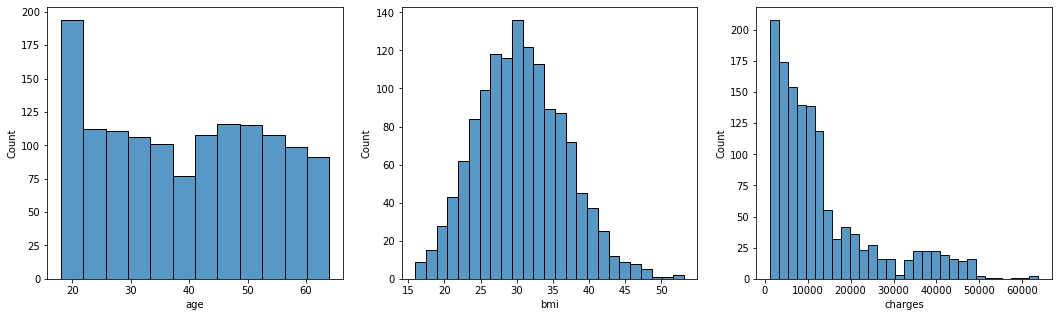

In [47]:
plt.figure(figsize=[18,5])
plt.subplot(1,3, 1)
sns.histplot(x=df.age)
plt.subplot(1,3, 2)
sns.histplot(x=df.bmi)
plt.subplot(1,3, 3)
sns.histplot(x=df.charges);

- The ages are distributed semi-uniformly except for a peak around the 20s, and a slight decrease in count around the 40s
- The BMI seems to be norally distributed
- charges are skewed; lower charges are most common

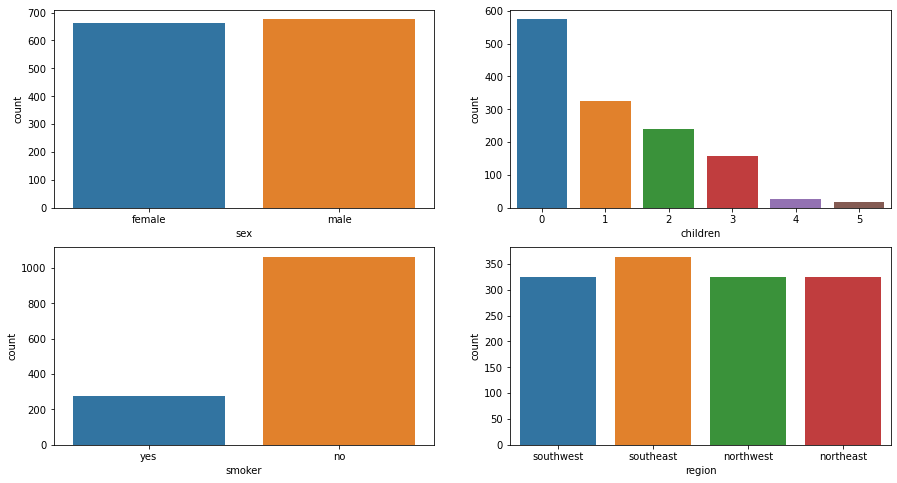

In [49]:
plt.figure(figsize=[15,8])
plt.subplot(2,2, 1)
sns.countplot(data=df, x='sex')
plt.subplot(2,2, 2)
sns.countplot(data=df, x='children')
plt.subplot(2,2, 3)
sns.countplot(data=df, x='smoker')
plt.subplot(2,2, 4)
sns.countplot(data=df, x='region');

- The numbers of males and females in the data are very close
- The number of participants decreases the higher the number of children they have gets
- Much more people are not smokers
- The regions of the participants seem to be uniformly distributed

### Multivariate Analysis

In [106]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges,smoker_num,region_num,sex_num
0,19,female,27.90,0,yes,southwest,16884.9240,1,4,2
1,18,male,33.77,1,no,southeast,1725.5523,0,3,1


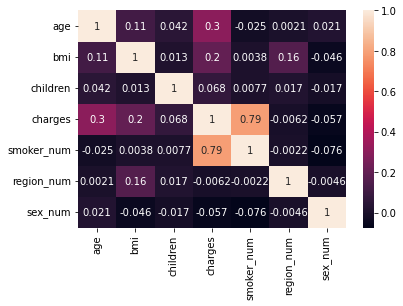

In [107]:
sns.heatmap(df2.corr(), annot=True);

The biggest correlation seems to be between the charges and whether the person is a smoker or not

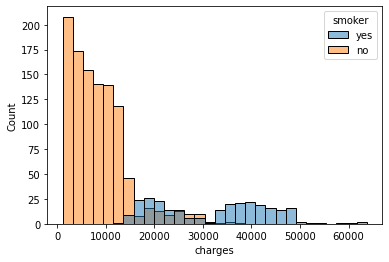

In [108]:
sns.histplot(data=df, x='charges', hue='smoker');

Most people with low charges are not smokers, while almost all people with higher charges are smokers

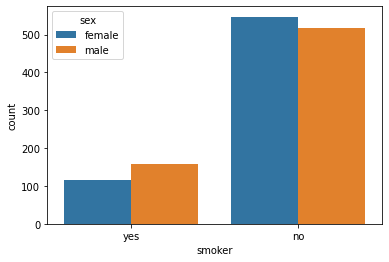

In [109]:
sns.countplot(data=df, x='smoker', hue='sex');

Smokers are more males than females<br>Non-smokers are more females than males

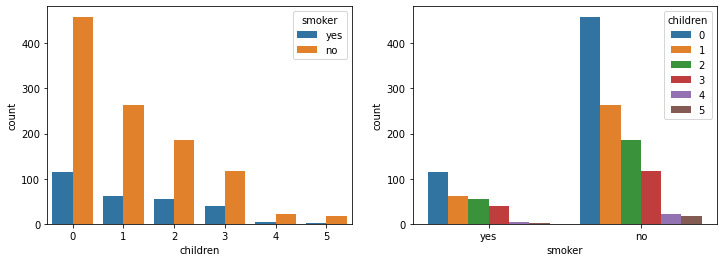

In [110]:
plt.figure(figsize=[12,4])
plt.subplot(1,2, 1)
sns.countplot(data=df, x='children', hue='smoker')
plt.subplot(1,2, 2)
sns.countplot(data=df, x='smoker', hue='children');

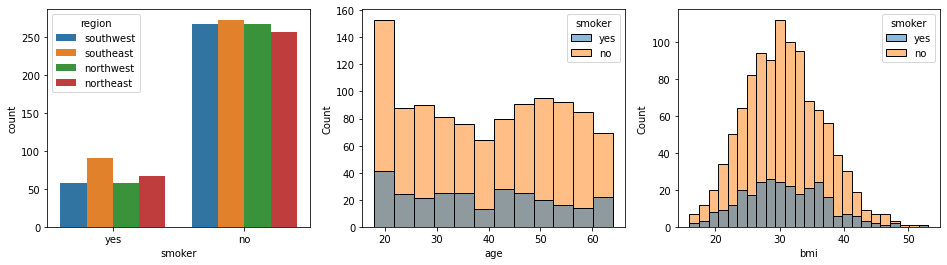

In [138]:
plt.figure(figsize=[16,4])
plt.subplot(1,3, 1)
sns.countplot(data=df, x='smoker', hue='region')
plt.subplot(1,3, 2)
sns.histplot(data=df, x='age', hue='smoker')
plt.subplot(1,3, 3)
sns.histplot(data=df, x='bmi', hue='smoker');

- The numbers of non-smokers are close in all regions, but the number of smokers in the southeastern region seems to be slightly more than other regions
- Age and BMI don't seem to affect whether a person smokes or not

In [139]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges,smoker_num,region_num,sex_num
0,19,female,27.90,0,yes,southwest,16884.9240,1,4,2
1,18,male,33.77,1,no,southeast,1725.5523,0,3,1


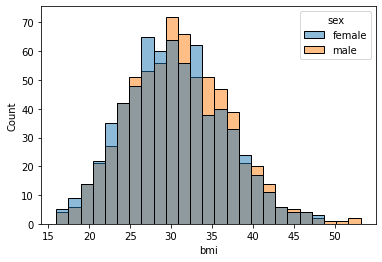

In [143]:
sns.histplot(data=df, x='bmi', hue='sex');

More men are in the upper-mid range of the distribution of BMI, as well as in the high extreme

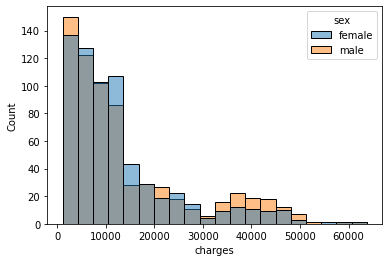

In [152]:
sns.histplot(data=df, x='charges', hue='sex', bins=20);

The 2 extremes of charges' values are paid by more men, while more women pay mid-range charges

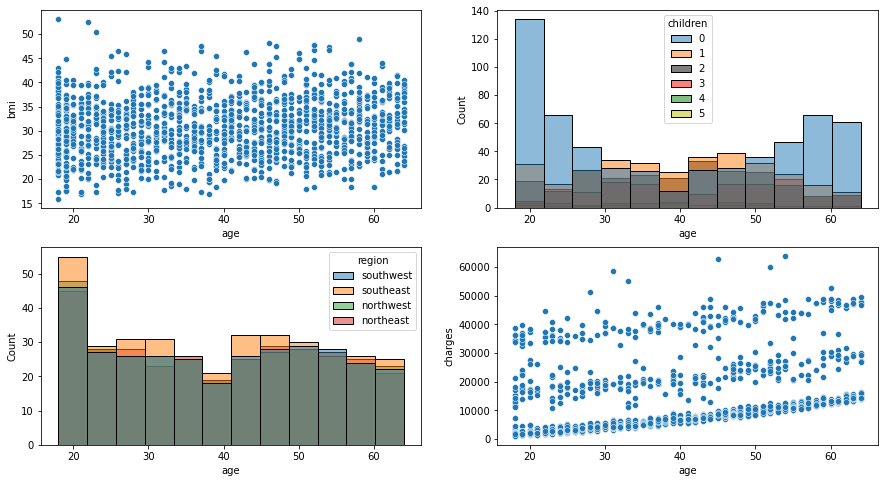

In [171]:
plt.figure(figsize=[15,8])
plt.subplot(2,2, 1)
sns.scatterplot(data=df, x='age', y='bmi')
plt.subplot(2,2, 2)
sns.histplot(data=df, x='age', hue='children', palette=["C0", "C1", "k", 'r', 'g', 'y'])
plt.subplot(2,2, 3)
sns.histplot(data=df, x='age', hue='region')
plt.subplot(2,2, 4)
sns.scatterplot(data=df, x='age', y='charges');

There are more people with no Children on the Age extremes, while in the mid-range there are more people with one child

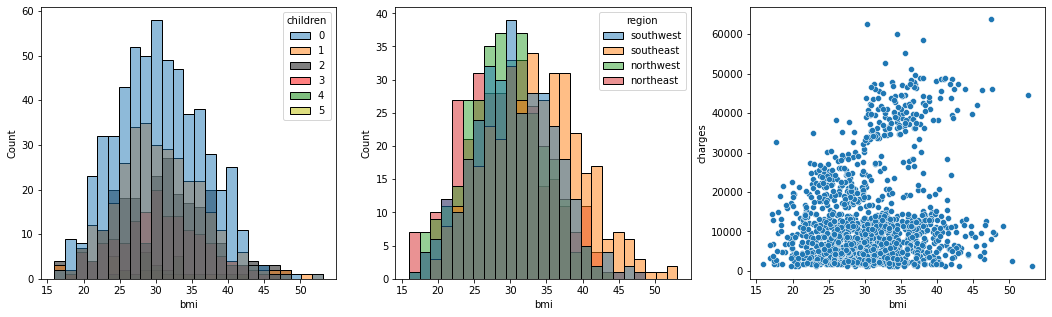

In [179]:
plt.figure(figsize=[18,5])
plt.subplot(1,3, 1)
sns.histplot(data=df, x='bmi', hue='children', palette=["C0", "C1", "k", 'r', 'g', 'y'])
plt.subplot(1,3, 2)
sns.histplot(data=df, x='bmi', hue='region')
plt.subplot(1,3, 3)
sns.scatterplot(data=df, x='bmi', y='charges');

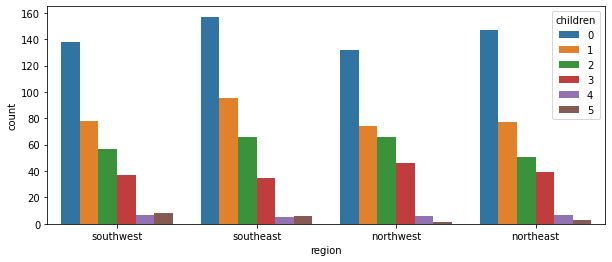

In [182]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='region', hue='children');